<a href="https://colab.research.google.com/github/PSLeon24/PyTorch_Tutorial/blob/main/Gradient_Descent_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
X = torch.Tensor(2, 3)
X

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [3]:
X = torch.tensor([[1, 2, 3],[4, 5, 6]])
X

tensor([[1, 2, 3],
        [4, 5, 6]])

In [4]:
x_tensor = torch.tensor(data=[2.0, 3.0], requires_grad=True)
x_tensor

tensor([2., 3.], requires_grad=True)

In [5]:
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)
y = x**2
z = 2*y+3

target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


<ipython-input-5-3728717930>:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(x.grad, y.grad, z.grad)


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [7]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)
noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
y = 2*x+3
y_noise = y + noise

In [8]:
model = nn.Linear(1, 1)
loss_func = nn.L1Loss()

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [16]:
label = y_noise

loss_arr = []

for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output, label)
  loss_arr.append(loss.data)
  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    print(loss.data)

param_list = list(model.parameters())
print(param_list[0].item(), param_list[1].item())

tensor(0.7997)
tensor(0.7990)
tensor(0.7985)
tensor(0.7980)
tensor(0.7976)
tensor(0.7972)
tensor(0.7970)
tensor(0.7967)
tensor(0.7966)
tensor(0.7964)
tensor(0.7962)
tensor(0.7961)
tensor(0.7960)
tensor(0.7960)
tensor(0.7959)
tensor(0.7959)
tensor(0.7958)
tensor(0.7958)
tensor(0.7958)
tensor(0.7957)
tensor(0.7957)
tensor(0.7957)
tensor(0.7957)
tensor(0.7957)
tensor(0.7957)
tensor(0.7957)
tensor(0.7957)
tensor(0.7957)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7956)
tensor(0.7955)
tensor(0.7955)
tensor(0.7955)
tensor(0.7955)
tensor(0.7955)
1.998221516609192 2.9393715858459473


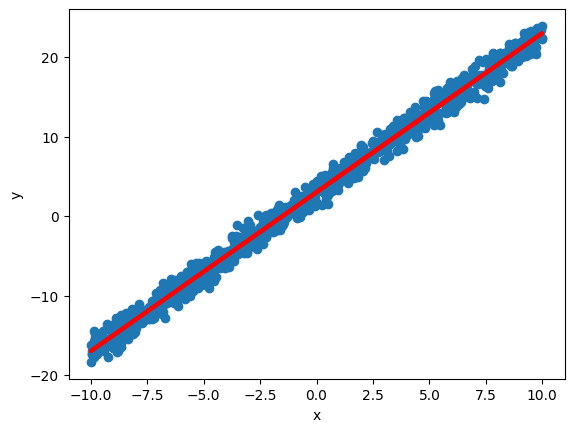

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x.data.numpy(), y_noise.data.numpy())
plt.plot(x.data.numpy(), y.data.numpy(), 'r-', lw=3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

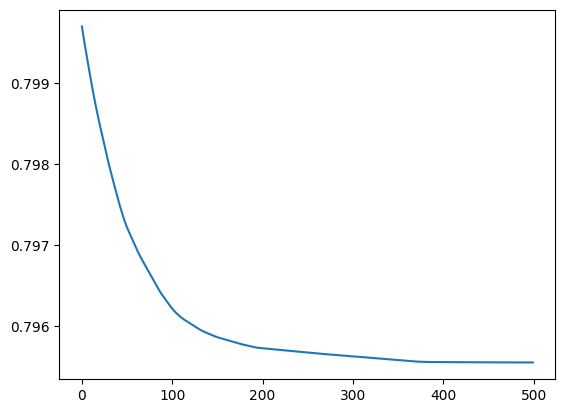

In [17]:
plt.plot(loss_arr)
plt.show()